# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info

cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


In [4]:
# Loop through the list of cities and perform a request for data on each
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

set = 0
i = 0

for city in cities:

    response = requests.get(query_url + city).json()
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cities_found.append(city)
        i = i + 1
        
        print(f"Processing Record {i} of Set {set} | {city}")
    
    except KeyError:
        
        set = set + 1
        i = 0
        print(f"City {city} can not be found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 0 | norman wells
Processing Record 2 of Set 0 | lavrentiya
Processing Record 3 of Set 0 | solhan
City taolanaro can not be found. Skipping...
City nizhneyansk can not be found. Skipping...
Processing Record 1 of Set 2 | sengiley
Processing Record 2 of Set 2 | yellowknife
Processing Record 3 of Set 2 | hobart
Processing Record 4 of Set 2 | severomuysk
Processing Record 5 of Set 2 | upernavik
Processing Record 6 of Set 2 | sept-iles
Processing Record 7 of Set 2 | conceicao do araguaia
City marcona can not be found. Skipping...
City bengkulu can not be found. Skipping...
Processing Record 1 of Set 4 | kavaratti
Processing Record 2 of Set 4 | vaini
Processing Record 3 of Set 4 | kefamenanu
Processing Record 4 of Set 4 | puerto ayora
Processing Record 5 of Set 4 | hermanus
Processing Record 6 of Set 4 | mataura
Processing Record 7 of Set 4 | belmonte
Processing Record 8 of Set 4 | kodiak
Processing Record 9 of

Processing Record 5 of Set 26 | dudinka
Processing Record 6 of Set 26 | kattivakkam
Processing Record 7 of Set 26 | inhambane
Processing Record 8 of Set 26 | siuna
Processing Record 9 of Set 26 | karratha
Processing Record 10 of Set 26 | karachi
Processing Record 11 of Set 26 | quatre cocos
Processing Record 12 of Set 26 | plettenberg bay
City olafsvik can not be found. Skipping...
Processing Record 1 of Set 27 | antofagasta
Processing Record 2 of Set 27 | sahuaripa
Processing Record 3 of Set 27 | mossendjo
Processing Record 4 of Set 27 | college
Processing Record 5 of Set 27 | kodinsk
Processing Record 6 of Set 27 | nantucket
Processing Record 7 of Set 27 | hay river
Processing Record 8 of Set 27 | tiksi
Processing Record 9 of Set 27 | marsh harbour
City tonj can not be found. Skipping...
Processing Record 1 of Set 28 | neustadt
Processing Record 2 of Set 28 | lebu
Processing Record 3 of Set 28 | chuy
Processing Record 4 of Set 28 | nanortalik
Processing Record 5 of Set 28 | tecoanapa

Processing Record 12 of Set 46 | whitianga
Processing Record 13 of Set 46 | ishinomaki
Processing Record 14 of Set 46 | kihei
Processing Record 15 of Set 46 | guarapari
Processing Record 16 of Set 46 | kavieng
Processing Record 17 of Set 46 | launceston
Processing Record 18 of Set 46 | charters towers
Processing Record 19 of Set 46 | bulungu
Processing Record 20 of Set 46 | vestmannaeyjar
Processing Record 21 of Set 46 | le vauclin
Processing Record 22 of Set 46 | grand forks
Processing Record 23 of Set 46 | mont-dore
Processing Record 24 of Set 46 | challapata
City louisbourg can not be found. Skipping...
Processing Record 1 of Set 47 | kortkeros
Processing Record 2 of Set 47 | vagay
Processing Record 3 of Set 47 | christchurch
Processing Record 4 of Set 47 | yuxia
City aflu can not be found. Skipping...
Processing Record 1 of Set 48 | sao miguel do guama
Processing Record 2 of Set 48 | mariinsk
Processing Record 3 of Set 48 | saint anthony
Processing Record 4 of Set 48 | carutapera
P

Processing Record 3 of Set 62 | orlik
Processing Record 4 of Set 62 | amberieu-en-bugey
Processing Record 5 of Set 62 | camacha
City dzhusaly can not be found. Skipping...
Processing Record 1 of Set 63 | noumea
Processing Record 2 of Set 63 | tateyama
Processing Record 3 of Set 63 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 63 | kutum
City ruatoria can not be found. Skipping...
Processing Record 1 of Set 64 | mitsamiouli
Processing Record 2 of Set 64 | san quintin
Processing Record 3 of Set 64 | saint-pierre
Processing Record 4 of Set 64 | piacabucu
Processing Record 5 of Set 64 | gambela
Processing Record 6 of Set 64 | nouadhibou
Processing Record 7 of Set 64 | yulara
Processing Record 8 of Set 64 | kastaneai
Processing Record 9 of Set 64 | bitung
Processing Record 10 of Set 64 | maniitsoq
Processing Record 11 of Set 64 | genc
Processing Record 12 of Set 64 | nsanje
Processing Record 13 of Set 64 | belaya gora
Processing Record 14 of Set 64 | north myrtle beach
Processing R

In [12]:
# create a data frame from cities, lat, and temp
weather_dict = {"city": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_data.to_csv(output_data_file, index=False, header=True)

In [14]:
weather_data.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,norman wells,20,CA,1551765600,78,65.28,-126.83,-10.00,4.10
1,lavrentiya,44,RU,1551768982,86,65.58,-170.99,-4.63,2.62
2,solhan,75,TR,1551768000,91,38.97,41.05,3.00,2.10
3,sengiley,90,RU,1551765600,92,53.96,48.79,-6.00,4.00
4,yellowknife,5,CA,1551769007,78,62.45,-114.38,-13.00,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

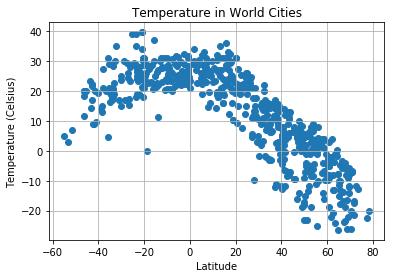

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

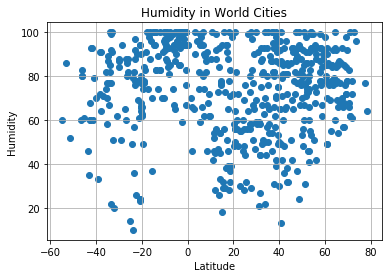

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

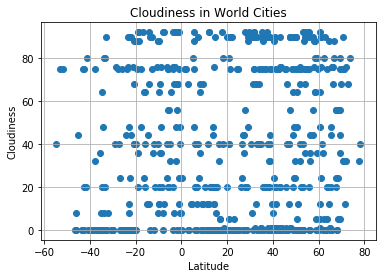

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

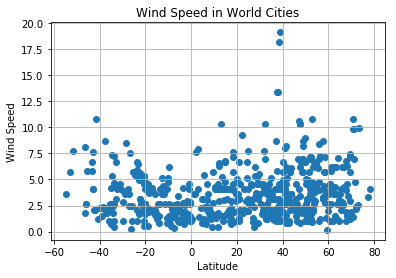

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windspeedInWorldCities.png")

# Show plot
plt.show()